In [81]:
import pandas as pd
import numpy as np
import urllib.request as libreq
from groq import Groq
import xml.etree.ElementTree as ET
import certifi
import os
from datetime import datetime
from tqdm import tqdm
from dotenv import load_dotenv
load_dotenv()
from bs4 import BeautifulSoup
import re
import PyPDF2
import io
import warnings
warnings.filterwarnings('ignore')
import geopandas
import geodatasets
import folium
from scholarly import ProxyGenerator
import matplotlib.pyplot as plt

os.environ['SSL_CERT_FILE'] = certifi.where()

In [2]:
pdf_link = 'arxiv.org/pdf/2503.01945'
pdf_response = libreq.urlopen('https://' + pdf_link)
pdf_file = pdf_response.read()
pdf_reader = PyPDF2.PdfReader(io.BytesIO(pdf_file))

In [3]:
# Extract text from PDF
pdf_text = ''
for page in pdf_reader.pages:
    pdf_text += page.extract_text()

In [4]:
pdf_text

'Astronomy &Astrophysics manuscript no. aanda ©ESO 2025\nMarch 5, 2025\nNo [CII] or dust detection in two Little Red Dots at zspec>7\nMengyuan Xiao1⋆, Pascal A. Oesch1,2,3, Longji Bing4, David Elbaz5, Jorryt Matthee6, Yoshinobu Fudamoto7,8, Seiji\nFujimoto9,10,11, Rui Marques-Chaves1, Christina C. Williams12,8, Miroslava Dessauges-Zavadsky1, Francesco\nValentino2,13, Gabriel Brammer2,3, Alba Covelo-Paz1, Emanuele Daddi5, Johan P. U. Fynbo2,3, Steven Gillman2,13,\nMichele Ginolfi14,15, Emma Giovinazzo1, Jenny E. Greene16, Qiusheng Gu17,18, Garth Illingworth19, Kohei Inayoshi20,\nVasily Kokorev10, Romain A. Meyer1, Rohan P. Naidu21,9, Naveen A. Reddy22, Daniel Schaerer1, Alice Shapley23,\nMauro Stefanon24,25, Charles L. Steinhardt26, David J. Setton16, Marianne Vestergaard27,8, and Tao Wang17,18\n(Affiliations can be found after the references)\nReceived xxx; accepted xxx\nABSTRACT\nLittle Red Dots (LRDs) are compact, point-like sources characterized by their red color and broad Balmer l

In [5]:
# Author Names 
# Extract all text till the word ABSTRACT appears
abstract_index = pdf_text.find('ABSTRACT')
text_till_abstract = pdf_text[:abstract_index]
text_till_abstract

'Astronomy &Astrophysics manuscript no. aanda ©ESO 2025\nMarch 5, 2025\nNo [CII] or dust detection in two Little Red Dots at zspec>7\nMengyuan Xiao1⋆, Pascal A. Oesch1,2,3, Longji Bing4, David Elbaz5, Jorryt Matthee6, Yoshinobu Fudamoto7,8, Seiji\nFujimoto9,10,11, Rui Marques-Chaves1, Christina C. Williams12,8, Miroslava Dessauges-Zavadsky1, Francesco\nValentino2,13, Gabriel Brammer2,3, Alba Covelo-Paz1, Emanuele Daddi5, Johan P. U. Fynbo2,3, Steven Gillman2,13,\nMichele Ginolfi14,15, Emma Giovinazzo1, Jenny E. Greene16, Qiusheng Gu17,18, Garth Illingworth19, Kohei Inayoshi20,\nVasily Kokorev10, Romain A. Meyer1, Rohan P. Naidu21,9, Naveen A. Reddy22, Daniel Schaerer1, Alice Shapley23,\nMauro Stefanon24,25, Charles L. Steinhardt26, David J. Setton16, Marianne Vestergaard27,8, and Tao Wang17,18\n(Affiliations can be found after the references)\nReceived xxx; accepted xxx\n'

In [51]:
import requests

prompt = "Do not output any text other than the required info. Can you extract the author names from the following text as a list. Each of the authors also have a corresponding number after their name which is associated with their affiliation. Preserve this number with author name" + text_till_abstract

url = os.environ['VERCEL_WEB']
payload = {
    "prompt": prompt,
    
}

response = requests.post(url, json=payload)
print("Status Code:", response.status_code)
print("Response Data:", response.json())

Status Code: 200
Response Data: {'data': '1. Mengyuan Xiao1\n2. Pascal A. Oesch1,2,3\n3. Longji Bing4\n4. David Elbaz5\n5. Jorryt Matthee6\n6. Yoshinobu Fudamoto7,8\n7. Seiji Fujimoto9,10,11\n8. Rui Marques-Chaves1\n9. Christina C. Williams12,8\n10. Miroslava Dessauges-Zavadsky1\n11. Francesco Valentino2,13\n12. Gabriel Brammer2,3\n13. Alba Covelo-Paz1\n14. Emanuele Daddi5\n15. Johan P. U. Fynbo2,3\n16. Steven Gillman2,13\n17. Michele Ginolfi14,15\n18. Emma Giovinazzo1\n19. Jenny E. Greene16\n20. Qiusheng Gu17,18\n21. Garth Illingworth19\n22. Kohei Inayoshi20\n23. Vasily Kokorev10\n24. Romain A. Meyer1\n25. Rohan P. Naidu21,9\n26. Naveen A. Reddy22\n27. Daniel Schaerer1\n28. Alice Shapley23\n29. Mauro Stefanon24,25\n30. Charles L. Steinhardt26\n31. David J. Setton16\n32. Marianne Vestergaard27,8\n33. Tao Wang17,18'}


In [52]:
# Extracting Author Names from JSON
author_names = response.json()['data']
author_names = author_names.split('\n')
author_names = [name for name in author_names if name != '']
author_names

['1. Mengyuan Xiao1',
 '2. Pascal A. Oesch1,2,3',
 '3. Longji Bing4',
 '4. David Elbaz5',
 '5. Jorryt Matthee6',
 '6. Yoshinobu Fudamoto7,8',
 '7. Seiji Fujimoto9,10,11',
 '8. Rui Marques-Chaves1',
 '9. Christina C. Williams12,8',
 '10. Miroslava Dessauges-Zavadsky1',
 '11. Francesco Valentino2,13',
 '12. Gabriel Brammer2,3',
 '13. Alba Covelo-Paz1',
 '14. Emanuele Daddi5',
 '15. Johan P. U. Fynbo2,3',
 '16. Steven Gillman2,13',
 '17. Michele Ginolfi14,15',
 '18. Emma Giovinazzo1',
 '19. Jenny E. Greene16',
 '20. Qiusheng Gu17,18',
 '21. Garth Illingworth19',
 '22. Kohei Inayoshi20',
 '23. Vasily Kokorev10',
 '24. Romain A. Meyer1',
 '25. Rohan P. Naidu21,9',
 '26. Naveen A. Reddy22',
 '27. Daniel Schaerer1',
 '28. Alice Shapley23',
 '29. Mauro Stefanon24,25',
 '30. Charles L. Steinhardt26',
 '31. David J. Setton16',
 '32. Marianne Vestergaard27,8',
 '33. Tao Wang17,18']

In [59]:
abstract_index = pdf_text.find('ABSTRACT')
text_till_abstract = pdf_text[:abstract_index]
text_till_abstract

reference_index = pdf_text.find('References')
reference_text = pdf_text[reference_index:]
reference_text

'References\nAkins, H. B., Casey, C. M., Allen, N., et al. 2023, ApJ, 956, 61\nAkins, H. B., Casey, C. M., Berg, D. A., et al. 2025, ApJ, 980, L29\nAkins, H. B., Casey, C. M., Lambrides, E., et al. 2024, arXiv e-prints,\narXiv:2406.10341\nAlcalde Pampliega, B., Pérez-González, P. G., Barro, G., et al. 2019, ApJ, 876,\n135\nAnanna, T. T., Bogdán, Á., Kovács, O. E., Natarajan, P., & Hickox, R. C. 2024,\nApJ, 969, L18\nBaggen, J. F. W., van Dokkum, P., Brammer, G., et al. 2024, ApJ, 977, L13\nBarro, G., Pérez-González, P. G., Kocevski, D. D., et al. 2024, ApJ, 963, 128\nBarrufet, L., Oesch, P. A., Marques-Chaves, R., et al. 2025, MN-\nRAS[ arXiv:2404.08052 ]\nBarrufet, L., Oesch, P. A., Weibel, A., et al. 2023, MNRAS, 522, 449\nBertin, E. & Arnouts, S. 1996, A&AS, 117, 393\nBéthermin, M., Fudamoto, Y ., Ginolfi, M., et al. 2020, A&A, 643, A2\nBing, L., Béthermin, M., Lagache, G., et al. 2023, A&A, 677, A66\nBoquien, M., Burgarella, D., Roehlly, Y ., et al. 2019, A&A, 622, A103\nBruzual, G

In [61]:
prompt = "Do not output any text other than the required info. Can you extract the affiliations from the text as a list. The affiliations will have a number just before them and please preserve this number. Mind you this is not the references but the affiliations so look for names of institutes for example" + reference_text
url = os.environ['VERCEL_WEB']
payload = {
    "prompt": prompt,
    
}

response = requests.post(url, json=payload)
print("Status Code:", response.status_code)
print("Response Data:", response.json())

Status Code: 200
Response Data: {'data': '1. Department of Astronomy, University of Geneva, Chemin Pegasi 51, 1290 Versoix, Switzerland\n2. Cosmic Dawn Center (DAWN), Denmark\n3. Niels Bohr Institute, University of Copenhagen, Jagtvej 128, København N, DK-2200, Denmark\n4. Astronomy Centre, University of Sussex, Falmer, Brighton BN1 9QH, UK\n5. Université Paris-Saclay, Université Paris Cité, CEA, CNRS, AIM, 91191, Gif-sur-Yvette, France\n6. Institute of Science and Technology Austria (ISTA), Am Campus 1, 3400 Klosterneuburg, Austria\n7. Center for Frontier Science, Chiba University, 1-33 Yayoi-cho, Inage-ku, Chiba 263-8522, Japan\n8. Steward Observatory, University of Arizona, 933 N Cherry Avenue, Tucson, AZ 85721, USA\n9. Hubble Fellow\n10. Department of Astronomy, The University of Texas at Austin, Austin, TX 78712, USA\n11. David A. Dunlap Department of Astronomy and Astrophysics, University of Toronto, 50 St. George Street, Toronto, Ontario, M5S 3H4, Canada\n12. NSF National Optica

In [63]:
author_affiliations = response.json()['data']
author_affiliations = author_affiliations.split('\n')
author_affiliations = [affiliation for affiliation in author_affiliations if affiliation != '']
author_affiliations

['1. Department of Astronomy, University of Geneva, Chemin Pegasi 51, 1290 Versoix, Switzerland',
 '2. Cosmic Dawn Center (DAWN), Denmark',
 '3. Niels Bohr Institute, University of Copenhagen, Jagtvej 128, København N, DK-2200, Denmark',
 '4. Astronomy Centre, University of Sussex, Falmer, Brighton BN1 9QH, UK',
 '5. Université Paris-Saclay, Université Paris Cité, CEA, CNRS, AIM, 91191, Gif-sur-Yvette, France',
 '6. Institute of Science and Technology Austria (ISTA), Am Campus 1, 3400 Klosterneuburg, Austria',
 '7. Center for Frontier Science, Chiba University, 1-33 Yayoi-cho, Inage-ku, Chiba 263-8522, Japan',
 '8. Steward Observatory, University of Arizona, 933 N Cherry Avenue, Tucson, AZ 85721, USA',
 '9. Hubble Fellow',
 '10. Department of Astronomy, The University of Texas at Austin, Austin, TX 78712, USA',
 '11. David A. Dunlap Department of Astronomy and Astrophysics, University of Toronto, 50 St. George Street, Toronto, Ontario, M5S 3H4, Canada',
 '12. NSF National Optical-Infra

In [64]:
# Extract countries from author affiliations
countries = [affiliation.split(',')[-1].strip() for affiliation in author_affiliations]
countries

['Switzerland',
 'Denmark',
 'Denmark',
 'UK',
 'France',
 'Austria',
 'Japan',
 'USA',
 '9. Hubble Fellow',
 'USA',
 'Canada',
 'USA',
 'Denmark',
 'Italy',
 'Italy',
 'USA',
 'China',
 'China',
 'USA',
 'China',
 'USA',
 'USA',
 'USA',
 'Spain',
 '25. Unidad Asociada CSIC “Grupo de Astrofísica Extragaláctica y Cosmología" (Instituto de Física de Cantabria - Universitat de València)',
 'USA',
 'Denmark']

In [89]:
# Get latitude and longitude of countries
from geopy.geocoders import Nominatim
import pycountry
import time

def get_coordinates(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="http")
        location = geolocator.geocode(country_obj.name)
        time.sleep(2)  # Wait for 1 second before sending the next request
        return location.latitude, location.longitude
    except AttributeError:
        return None, None

In [95]:
unique_countries = list(set(countries))

if 'USA' in unique_countries:
    unique_countries.remove('USA')
    unique_countries.append('United States')
if 'UK' in unique_countries:
    unique_countries.remove('UK')
    unique_countries.append('United Kingdom')
if 'UAE' in unique_countries:
    unique_countries.remove('UAE')
    unique_countries.append('United Arab Emirates')

# Remove any non-country entries from unique_countries
unique_countries = [country for country in unique_countries if pycountry.countries.get(name=country)]
print(unique_countries)

# Count the number of times each country is repeated
country_counts = {country: countries.count(country) for country in unique_countries}

df = pd.DataFrame({'country': unique_countries})
df[['latitude', 'longitude']] = df['country'].apply(get_coordinates).apply(pd.Series)
df['repeats'] = df['country'].map(country_counts)
df

['Japan', 'Italy', 'China', 'Switzerland', 'France', 'Canada', 'Spain', 'Austria', 'Denmark', 'United States', 'United Kingdom']


,country,latitude,longitude,repeats
0,Japan,36.574844,139.239418,1
1,Italy,42.638426,12.674297,2
2,China,35.000066,104.999955,3
3,Switzerland,46.798562,8.231974,1
4,France,46.603354,1.888334,1
5,Canada,61.066692,-107.991707,1
6,Spain,39.326068,-4.837979,1
7,Austria,47.593970,14.124560,1
8,Denmark,55.670249,10.333328,4
9,United States,39.783730,-100.445882,0


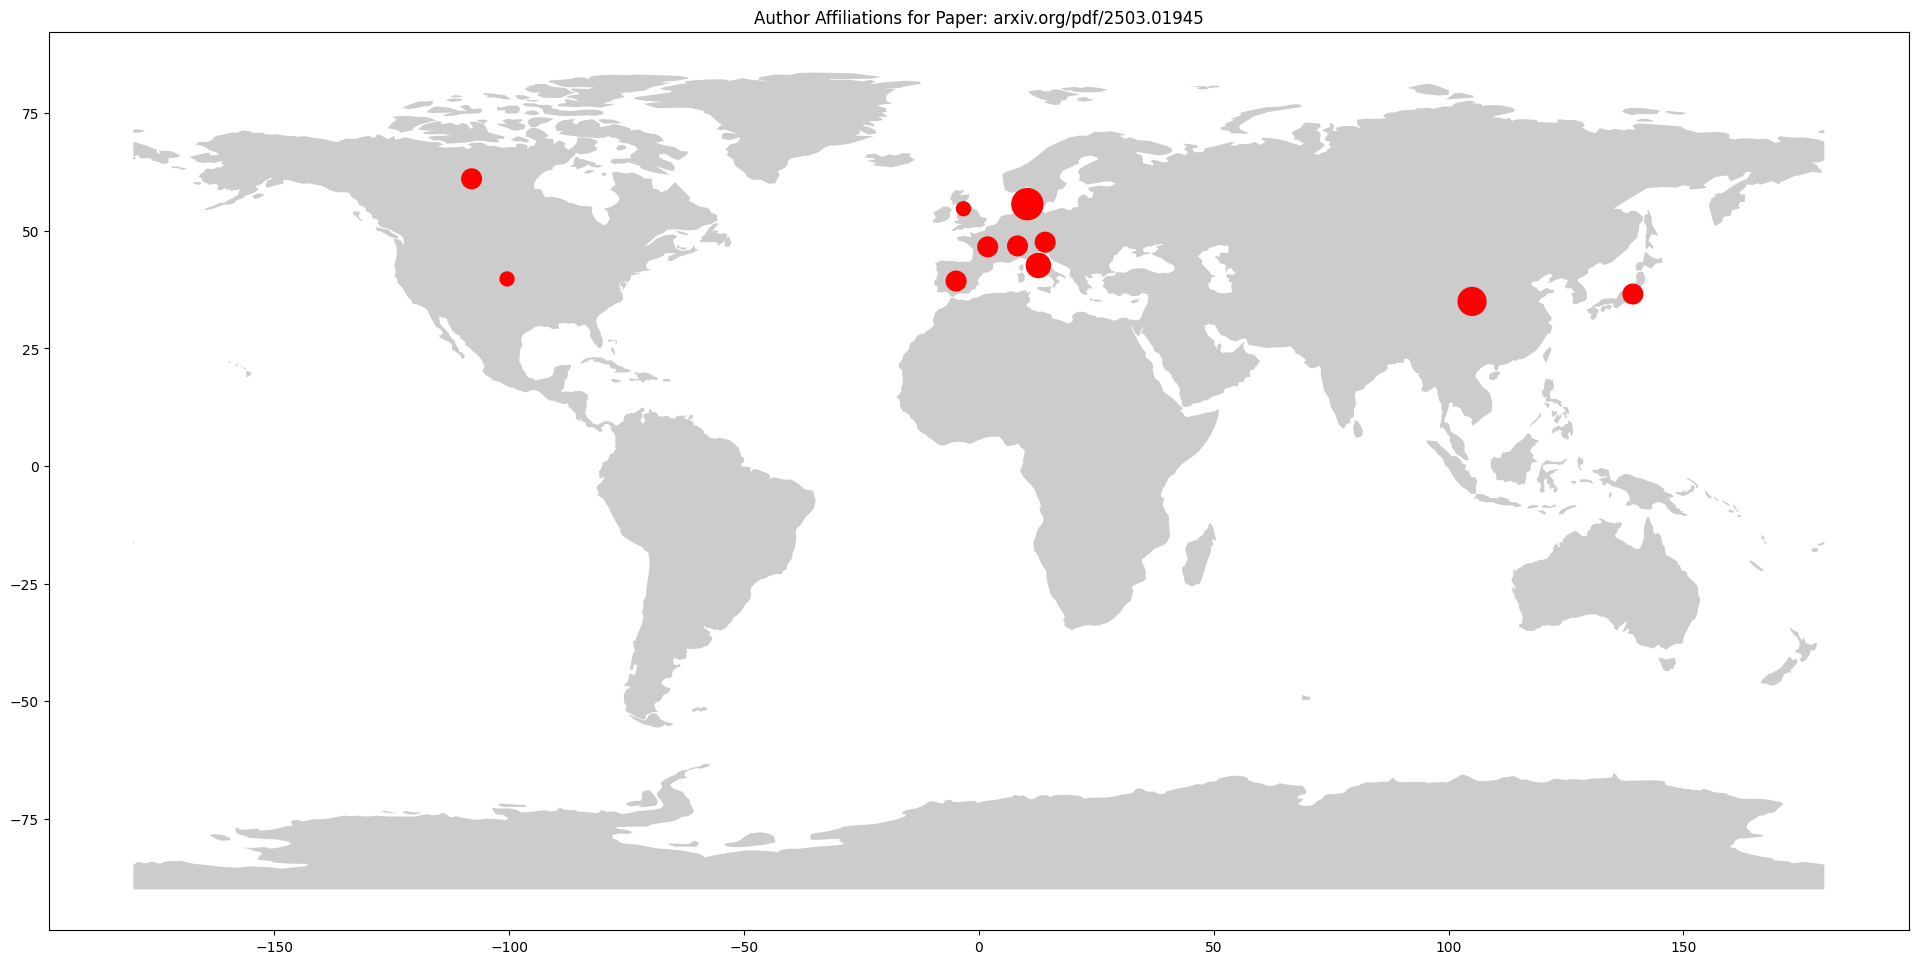

In [111]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))

fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
plt.scatter(df['longitude'], df['latitude'], color='red', s=100 * (df['repeats']+1), alpha=1)
plt.title('Author Affiliations for Paper: ' + pdf_link)
plt.show()